In [ ]:
# daniel_luft-martinez_2.ipynb

In [ ]:
"""File works as is, if all files are available """

In [2]:
import pandas as pd
import numpy as np
import string

import random

import geopandas as gpd
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import joblib
from joblib import dump,load

In [3]:

plt.rc('figure', figsize=(10, 10))

In [9]:
#print(people)
intermediary = pd.read_csv("panama_papers.nodes.intermediary.csv")
officer = pd.read_csv("panama_papers.nodes.officer.csv")
#address = pd.read_csv("panama_papers.nodes.address.csv")
entity = pd.read_csv("panama_papers.nodes.entity.csv")



C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
O_CC = dict(zip(officer.iloc[:]['name'],officer.iloc[:]['country_codes']))
I_CC = dict(zip(intermediary.iloc[:]['name'],intermediary.iloc[:]['country_codes']))
E_CC = dict(zip(entity.iloc[:]['name'],entity.iloc[:]['country_codes']))
#A_CC = dict(zip(address.iloc[:]['name'],address.iloc[:]['country_codes']))

In [11]:
# O_AD = dict(zip(officer.iloc[:]['name'],officer.iloc[:]['address']))
# I_AD = dict(zip(intermediary.iloc[:]['name'],intermediary.iloc[:]['address']))
# E_AD = dict(zip(entity.iloc[:]['name'],entity.iloc[:]['address']))

In [12]:
#print(random.choice(O_CC))
key, value = random.choice(list(O_CC.items()))
print(key + " " + str(value) )

HAN DONG CHN


In [13]:
intermediary = pd.read_csv("paradise_papers.nodes.intermediary.csv")
officer = pd.read_csv("paradise_papers.nodes.officer.csv")
#address = pd.read_csv("panama_papers.nodes.address.csv")
entity = pd.read_csv("paradise_papers.nodes.entity.csv")


O_CC.update(dict(zip(officer.iloc[:]['name'],officer.iloc[:]['country_codes'])))
I_CC.update(dict(zip(intermediary.iloc[:]['name'],intermediary.iloc[:]['country_codes'])))
E_CC.update(dict(zip(entity.iloc[:]['name'],entity.iloc[:]['country_codes'])))
#A_CC = dict(zip(address.iloc[:]['name'],address.iloc[:]['country_codes']))

C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,5,8,9,10,11,12,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
O_CC_counts = {}
Ototal = 0
for person,CC in list(O_CC.items()):
    Ototal+=1
    if CC in O_CC_counts:
        O_CC_counts[CC] = O_CC_counts[CC] + 1
    else:
        O_CC_counts[CC] = 1

In [15]:
I_CC_counts = {}
Itotal = 0
for person,CC in list(I_CC.items()):
    Itotal+=1
    if CC in I_CC_counts:
        I_CC_counts[CC] = I_CC_counts[CC] + 1
    else:
        I_CC_counts[CC] = 1

In [16]:
E_CC_counts = {}
Etotal = 0
for person,CC in list(E_CC.items()):
    Etotal+=1
    if CC in E_CC_counts:
        E_CC_counts[CC] =E_CC_counts[CC] + 1
    else:
        E_CC_counts[CC] = 1

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
# world.plot()

In [18]:
Oworld = world
print(type(Oworld))
Oworld['officers'] = 0
Oworld['officer_ratio'] = 0
for index,country in Oworld.iterrows():
    if country['iso_a3'] in O_CC_counts:
        country['officers'] = O_CC_counts[country['iso_a3']]
        country['officer_ratio'] =  (O_CC_counts[country['iso_a3']]/Ototal)
    else:
        country['officers'] = 0
        country['officer_ratio'] = 0
#     if country['iso_a3'] == "CHN":
#          country['officer_ratio'] =  (O_CC_counts[country['iso_a3']]/Ototal)
#     if country['name'] =="United Kingdom":
#         country['officer_ratio'] =  (O_CC_counts[country['iso_a3']]/total)/1
    #print(type(country))
    Oworld.loc[index] = country
    
#print(Oworld['iso_a3'])


<class 'geopandas.geodataframe.GeoDataFrame'>


In [19]:
Iworld = world
print(type(Iworld))
Iworld['intermediarys'] = 0
Iworld['intermediary_ratio'] = 0
for index,country in Iworld.iterrows():
    if country['iso_a3'] in I_CC_counts:
        country['intermediarys'] = I_CC_counts[country['iso_a3']]
        country['intermediary_ratio'] =  (I_CC_counts[country['iso_a3']]/Itotal)
    else:
        country['intermediarys'] = 0
        country['intermediary_ratio'] = 0
#     if country['name'] =="United Kingdom":
#          country['intermediary_ratio'] =  (I_CC_counts[country['iso_a3']]/total)/5
#     if country['name'] =="Switzerland":
#          country['intermediary_ratio'] =  (I_CC_counts[country['iso_a3']]/total)/100
    #print(type(country))
    Iworld.loc[index] = country
    
#print(Iworld['iso_a3'])

<class 'geopandas.geodataframe.GeoDataFrame'>


In [20]:
Eworld = world
print(type(Eworld))
Eworld['entitys'] = 0
Eworld['entity_ratio'] = 0
for index,country in Eworld.iterrows():
    if country['iso_a3'] in E_CC_counts:
        country['entitys'] = E_CC_counts[country['iso_a3']]
        country['entity_ratio'] =  (E_CC_counts[country['iso_a3']]/Etotal)
    else:
        country['entitys'] = 0
        country['entity_ratio'] = 0
#     if country['name'] =="United Kingdom":
#          country['entity_ratio'] =  (E_CC_counts[country['iso_a3']]/total)/10
#     if country['name'] =="Switzerland":
#          country['intermediary_ratio'] =  (E_CC_counts[country['iso_a3']]/total)/100
    #print(type(country))
    Eworld.loc[index] = country
    
#print(Eworld['iso_a3'])

<class 'geopandas.geodataframe.GeoDataFrame'>


In [5]:
from joblib import dump,load

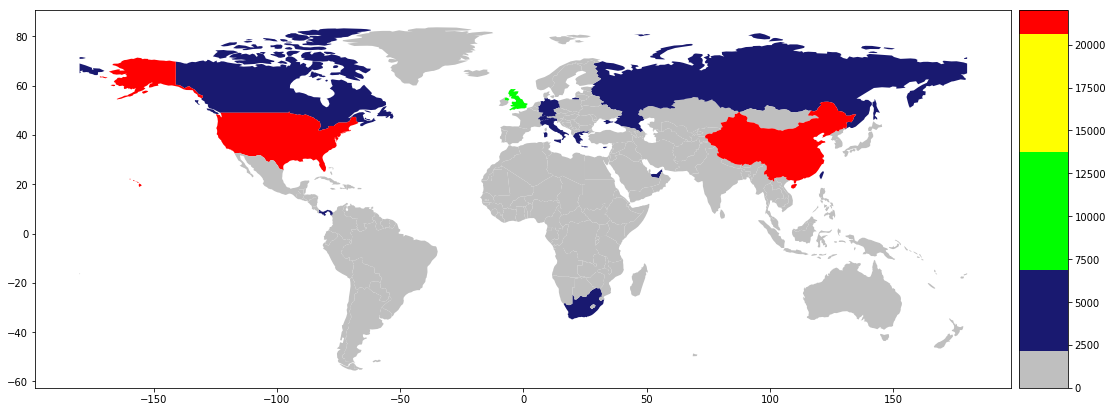

In [6]:
fig, ax = plt.subplots(1, 1)
#world.plot(column='officers', ax=ax, legend=True)
divider = make_axes_locatable(ax)
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
cax = divider.append_axes("right", size="5%", pad=0.1)


viridis = mpl.cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([192/256, 192/256, 192/256, 1])
navy_blue = np.array([25/256,25/256,112/256, 1])
lime_green =  np.array([0/256,256/256,0/256, 1])
yellow = np.array([1,1,0,1])
red = np.array([1,0,0,1])

newcolors[:25, :] = grey
newcolors[25:80, :] = navy_blue
newcolors[80:160, :] = lime_green
newcolors[160:240, :] = yellow
newcolors[240:, :] = red

newcmp = ListedColormap(newcolors)

#dump(Oworld, 'Oworld.joblib')

Oworld2 = load('Oworld.joblib')
#fig.colorbar(ax, ticks=[0, 2500, 6000,1300,2400])
Oworld2.plot(column='officers', ax=ax, cmap=newcmp, legend=True, cax=cax)



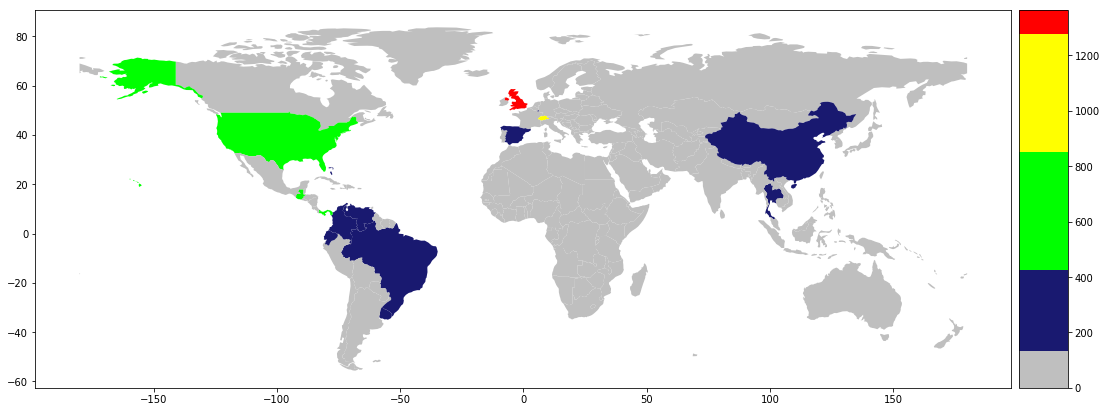

In [32]:
fig, ax = plt.subplots(1, 1)
#world.plot(column='officers', ax=ax, legend=True)
divider = make_axes_locatable(ax)
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
cax = divider.append_axes("right", size="5%", pad=0.1)


# viridis = mpl.cm.get_cmap('viridis', 256)
# newcolors = viridis(np.linspace(0, 1, 256))
# grey = np.array([192/256, 192/256, 192/256, 1])
# navy_blue = np.array([25/256,25/256,112/256, 1])
# sea_green =  np.array([69/256, 210/256, 131/256, 1])
# yellow = np.array([1,1,0,1])
# red = np.array([1,0,0,1])

# newcolors[:25, :] = grey
# newcolors[25:80, :] = navy_blue
# newcolors[80:160, :] = dark_sea_green
# newcolors[160:240, :] = yellow
# newcolors[240:, :] = red
dump(Iworld, 'Iworld.joblib')

Iworld2 = load('Iworld.joblib')
newcmp = ListedColormap(newcolors)

Iworld.plot(column='intermediarys', ax=ax,  cmap=newcmp, legend=True, cax=cax)

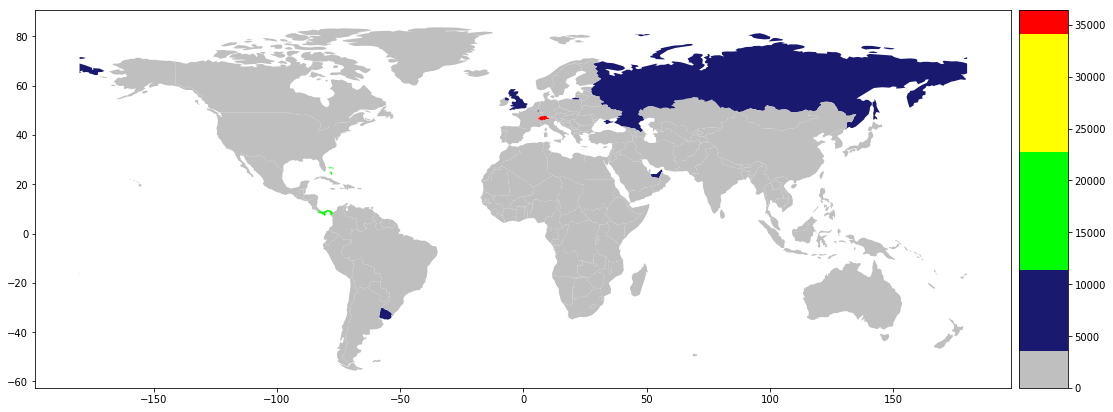

In [33]:
fig, ax = plt.subplots(1, 1)
#world.plot(column='officers', ax=ax, legend=True)
divider = make_axes_locatable(ax)
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
cax = divider.append_axes("right", size="5%", pad=0.1)

dump(Eworld, 'Eworld.joblib')

Eworld = load('Eworld.joblib')
newcmp = ListedColormap(newcolors)


Eworld.plot(column='entitys', ax=ax,  cmap=newcmp, legend=True, cax=cax)